# Lead Scoring Case Study

This is a Case Study related to an Education company trying to find out potential leads that could get converted into customers. This is a group case study. Our Group comprises of:

1. Likhitha C
2. Wahid
3. Venkata Koushik Akella

## Problem statement

X Education company needs help to identify the most promising leads. This has to be done by building a Logistic regression model that can be trained with the Leads data of the past and then deployed to predict whether a particular lead will lead to payment or not. Each lead has to be given a lead score between 0 and 100 where less score means not a promising lead and vice-versa. the CEO has also given a ballpark target lead conversion rate to be 80%. 

## Goals:
1. build a logistic regression model to assign a lead score between 0 and 100 to each lead and based on the lead, classify them as hot leads or not so hot leads. 
2. The model is expected to fit certain other problems put forth by the X Education company in the form of a separate word document. fill the solutions to those problems based on the model we get in the end of this analysis.

## Step-1: Loading and Understanding data:

In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# Loading database
lead = pd.read_csv('Leads.csv', encoding="UTF8", header=0)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead.shape

(9240, 37)

In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# dropping columns having only single unique values
lead1 = lead.drop(['Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)
lead1.shape

(9240, 32)

In [11]:
# converting all string type data into lower case for ease of understanding
lead1 = lead1.applymap(lambda x: x.lower() if type(x) == str else x)
lead1.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,select,select,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,low in relevance,select,select,02.medium,02.medium,15.0,15.0,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,select,select,unemployed,better career prospects,no,no,no,no,no,no,ringing,NaN,select,select,02.medium,02.medium,15.0,15.0,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,select,student,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,ringing,not sure,select,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,select,other,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,select,mumbai,02.medium,01.high,15.0,18.0,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,landing page submission,google,no,no,1,2.0,1640,2.0,email opened,india,supply chain management,online search,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,low in relevance,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,landing page submission,direct traffic,no,no,0,2.0,71,2.0,email opened,india,it projects management,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,thane & outskirts,02.medium,02.medium,14.0,14.0,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,api,google,no,no,0,4.0,58,4.0,email opened,india,finance management,word of mouth,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,mumbai,02.medium,02.medium,13.0,16.0,no,email opened


In [12]:
# replacing all "select" cells with np.nan as these cells are those which were not selected.
lead1 = lead1.replace(to_replace="select", value=np.nan)
lead1.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,NaN,student,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,other,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,landing page submission,google,no,no,1,2.0,1640,2.0,email opened,india,supply chain management,online search,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,low in relevance,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,landing page submission,direct traffic,no,no,0,2.0,71,2.0,email opened,india,it projects management,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,thane & outskirts,02.medium,02.medium,14.0,14.0,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,api,google,no,no,0,4.0,58,4.0,email opened,india,finance management,word of mouth,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,mumbai,02.medium,02.medium,13.0,16.0,no,email opened


In [13]:
len(lead1)

9240

In [14]:
# calculating % missing values for different columns
round(100*((lead1.isnull().sum())/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# getting rid of all columns having nearly 40% or more missing values
lead2 = lead1.drop(['How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
lead2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified


<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'>in the above list of columns having close to 40% missing values, we are not getting rid of "Specialization" column as I think it is important for further analysis. hence leaving that column intact and will deal with missing values later </font> </div>

In [16]:
round(100*((lead2.isnull().sum())/len(lead2)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
# replacing NaN values in the 4 columns having more than 20% missing values 
# with "not selected" for our analysis purposes
lead2['Country'] = lead2['Country'].fillna("not selected")
lead2['Specialization'] = lead2['Specialization'].fillna("not selected")
lead2['What is your current occupation'] = lead2['What is your current occupation'].fillna("not selected")
lead2['What matters most to you in choosing a course'] = lead2['What matters most to you in choosing a course'].fillna("not selected")

In [18]:
lead2.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not selected,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not selected,not selected,not selected,not selected,no,no,no,no,no,no,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,landing page submission,google,no,no,1,2.0,1640,2.0,email opened,india,supply chain management,unemployed,better career prospects,no,no,no,no,no,no,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not selected,not selected,not selected,not selected,no,no,no,no,no,no,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,landing page submission,direct traffic,no,no,0,2.0,71,2.0,email opened,india,it projects management,not selected,not selected,no,no,no,no,no,no,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,api,google,no,no,0,4.0,58,4.0,email opened,india,finance management,not selected,not selected,no,no,no,no,no,no,no,email opened


In [19]:
lead2['Country'].value_counts()

india                   6492
not selected            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> in the "Country" column, there is an attribute called unknown. we'll convert that attribute to "not selected" as well for our analysis </font> </div>

In [20]:
def country_cat(x):
    if x=='india':
        return 'india'
    elif x=='not selected':
        return 'not selected'
    else:
        return 'out of india'

lead2['Country'] = lead2['Country'].map(lambda x: country_cat(x))
lead2['Country'].value_counts()

india           6492
not selected    2461
out of india     287
Name: Country, dtype: int64

In [21]:
# checking % missing values again
round(100*((lead2.isnull().sum())/len(lead2)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [22]:
# there are few columns that still have missing values. 
# however these are <2% and hence, eliminating these rows will not lead to data loss. 
# However let us check the % of null rows among total rows
round(100*(sum(lead2.isnull().sum(axis=1)>1)/len(lead2)),2)

1.48

In [23]:
lead3 = lead2[lead2.isnull().sum(axis=1)<1]
lead3.shape

(9074, 23)

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> as we can see from the above, there are 9074 rows left out of 9240 rows initially which is aroung 1.48% loss in data and can be accepted. for further analysis, we'll focuss on lead3 dataframe for the analysis</font> </div>

In [24]:
round(100*((lead3.isnull().sum())/len(lead3)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> as observed from the above, we can see there are no null values in the entire lead3 dataframe and hence we can start EDA analysis</font> </div>

In [25]:
lead3.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [26]:
lead3['Prospect ID'].nunique()

9074

In [27]:
unique = {}
for att in lead3.columns:
    unique[att] = lead3[att].nunique()
unique

{'Prospect ID': 9074,
 'Lead Number': 9074,
 'Lead Origin': 4,
 'Lead Source': 20,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Converted': 2,
 'TotalVisits': 41,
 'Total Time Spent on Website': 1717,
 'Page Views Per Visit': 114,
 'Last Activity': 17,
 'Country': 3,
 'Specialization': 19,
 'What is your current occupation': 7,
 'What matters most to you in choosing a course': 4,
 'Search': 2,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> as observed from the above, Prospect ID and Lead Number are unique for all the leads and hence can be dropped as they don't effect the analysis significantly.</font> </div>

In [28]:
lead3.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
lead3.shape

(9074, 21)

## Step-2: EDA:

<font color='Blue'>_**Univariate Analysis:**_</font>

In [29]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> first of all, I'll look into the object type variables and see the count_plots of these attributes.</font> </div>

In [30]:
obj_col = []
for col in lead3.columns:
    if lead3[col].dtype == 'O':
        obj_col.append(col)
obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [31]:
len(obj_col)

17

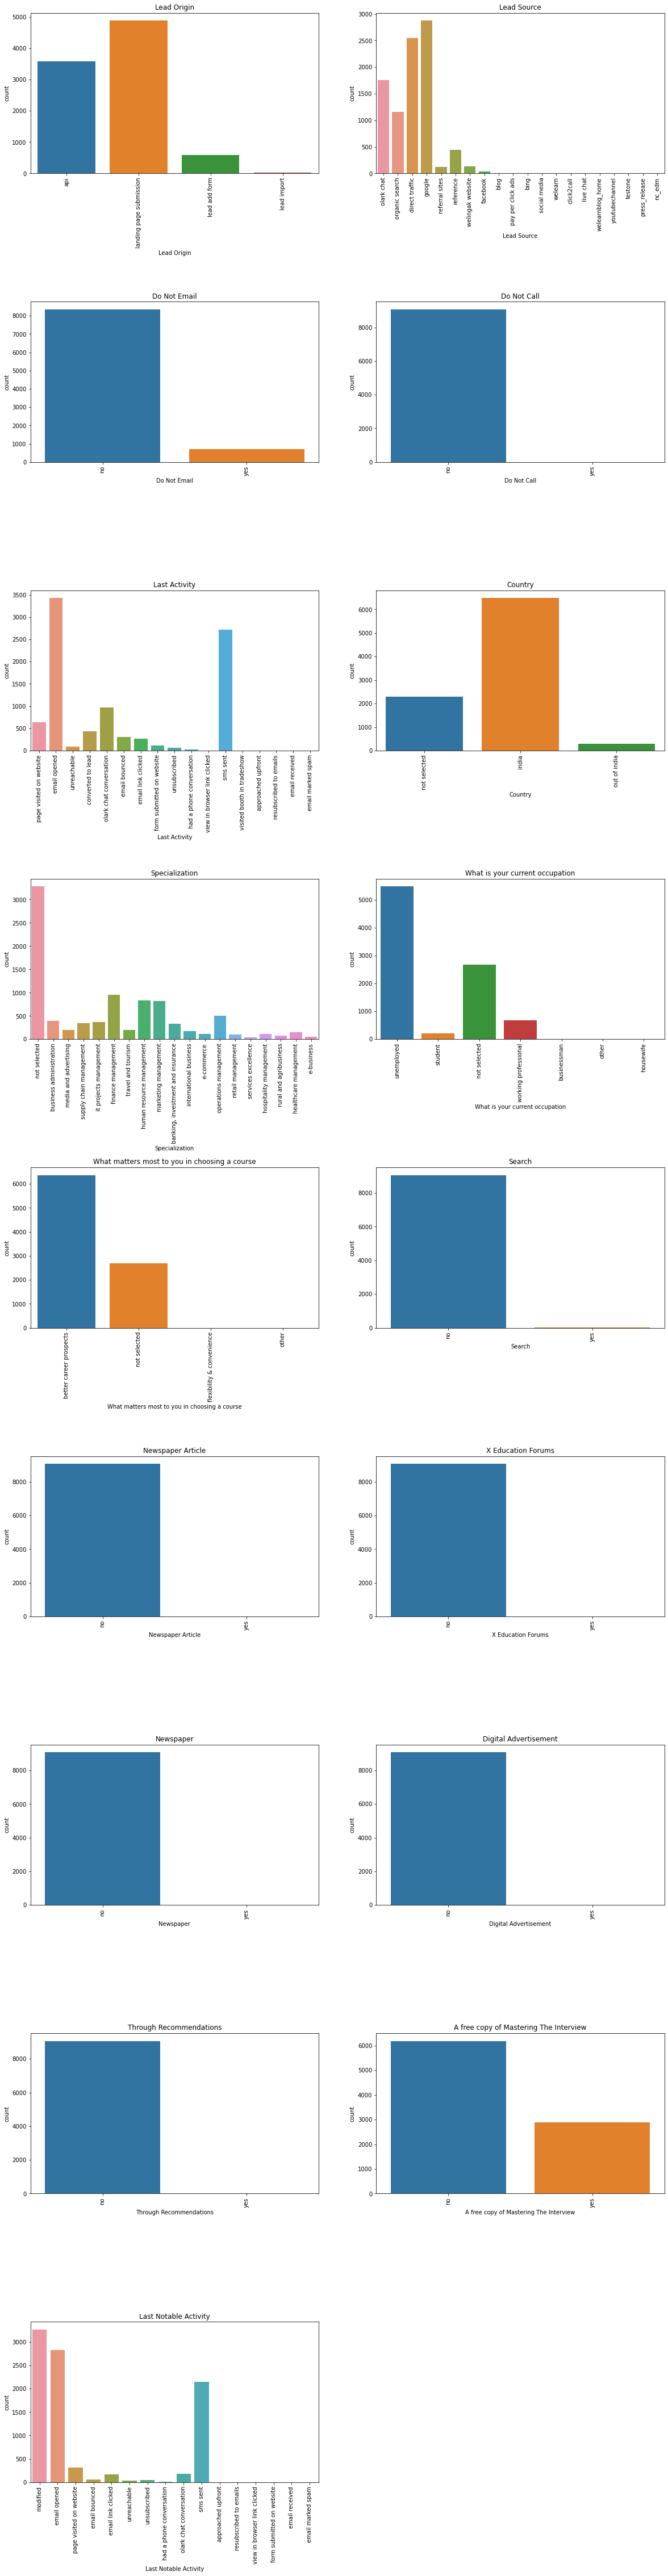

In [32]:
# there are 17 object type data in the dataframe.
# we'll do the count plots on these to visualize the distribution of the data.
i=1
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace=0.8)
for col in obj_col:
        plt.subplot(9,2,i)
        sns.countplot(lead3[col])
        plt.title('{}'.format(col))
        plt.xticks(rotation=90)
        i=i+1

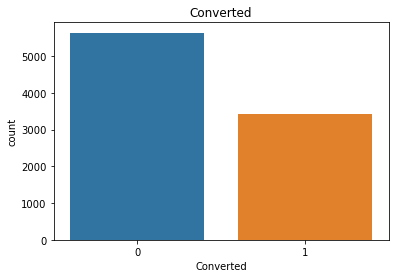

In [33]:
# plotting the "converted" column to see the % conversion rate
sns.countplot(lead3['Converted'])
plt.title("Converted")
plt.show()

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> now we'll look into the numerical type variables and do the univariate analysis of these variables</font> </div>

In [34]:
num_col = [col for col in lead3.columns if col not in obj_col]
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [35]:
num_df = lead3[num_col]
num_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


(0.0, 20.0)

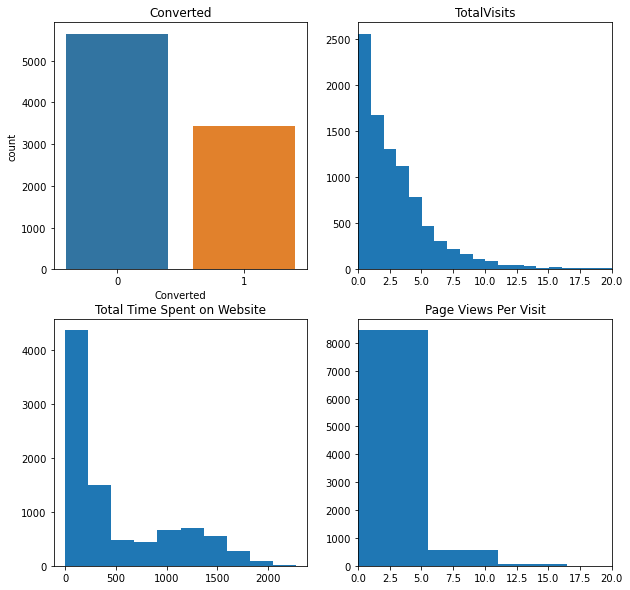

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(lead3['Converted'])
plt.title("Converted")

plt.subplot(2,2,2)
plt.hist(x='TotalVisits', data=lead3, bins=250)
plt.title("TotalVisits")
plt.xlim(0,20)

plt.subplot(2,2,3)
plt.hist(x='Total Time Spent on Website', data=lead3, bins=10)
plt.title("Total Time Spent on Website")

plt.subplot(2,2,4)
plt.hist(x='Page Views Per Visit', data=lead3, bins=10)
plt.title("Page Views Per Visit")
plt.xlim(0,20)

<font color='blue'>_**Bi-Variate analysis:**_</font>

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> in this bi-variate analysis, we'll pitch each categorical variable agains conversion rate to see how each attribute effects the conversion rate</font> </div>

In [37]:
# we have already segregated the categorical columns
obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

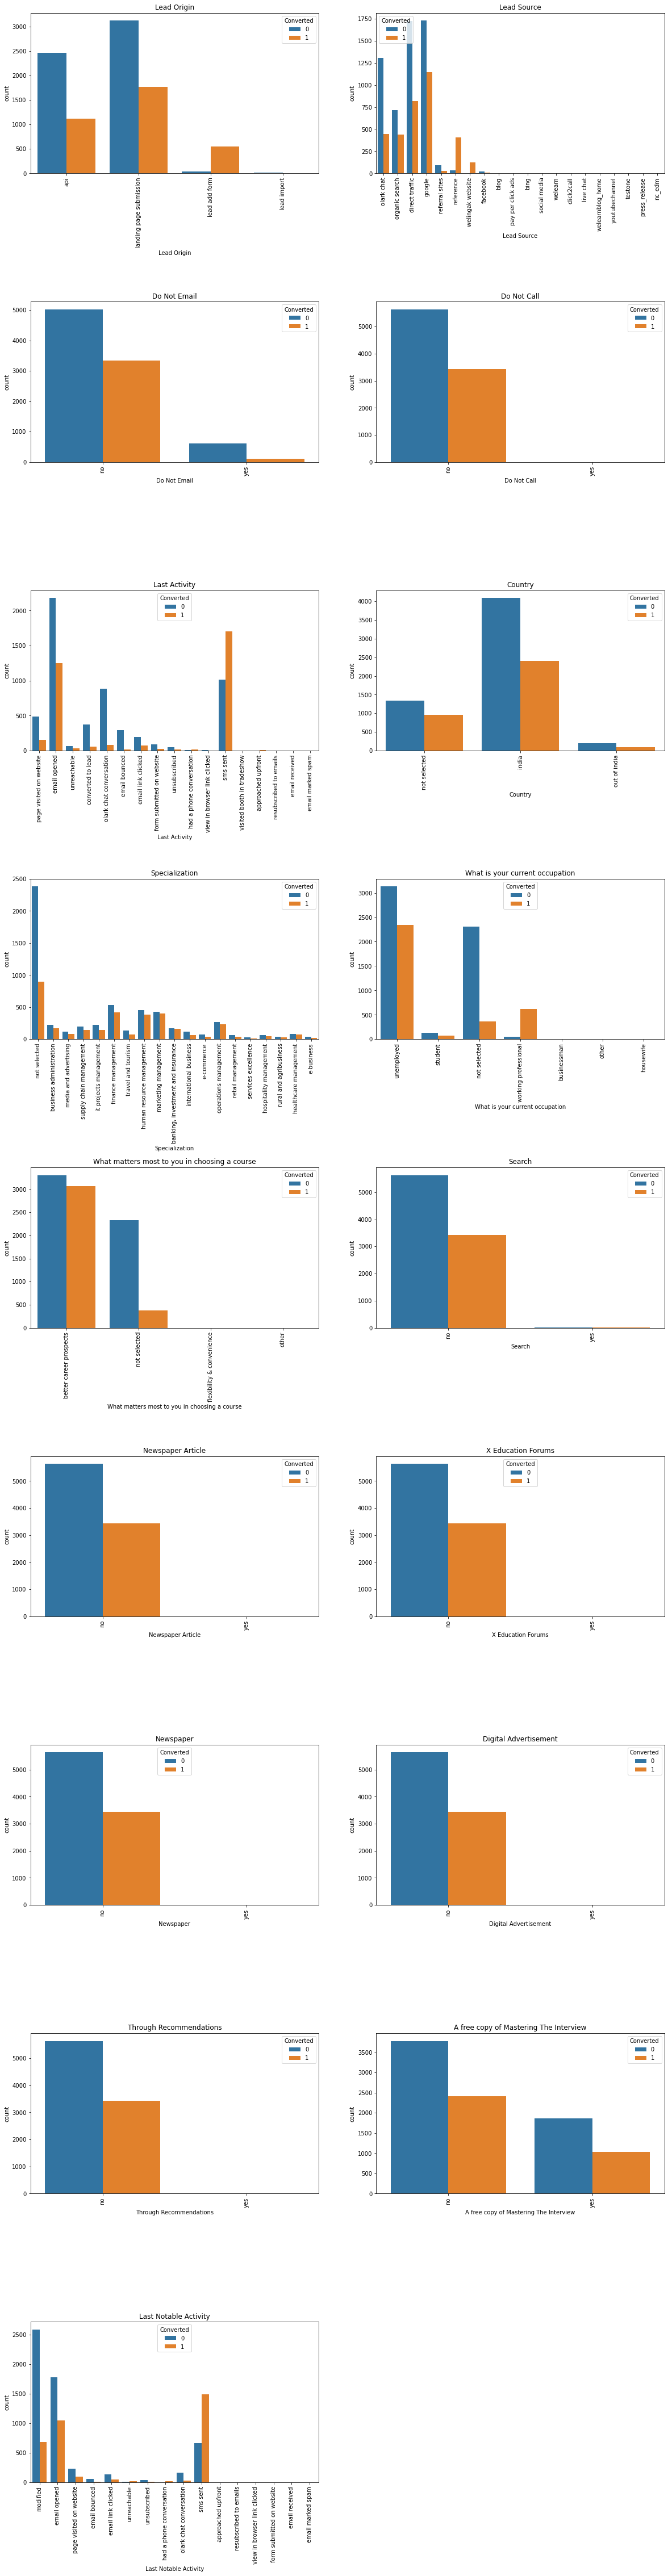

In [38]:
i=1
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace=0.8)
for col in obj_col:
        plt.subplot(9,2,i)
        sns.countplot(x=col, hue='Converted', data=lead3)
        plt.title('{}'.format(col))
        plt.xticks(rotation=90)
        i=i+1

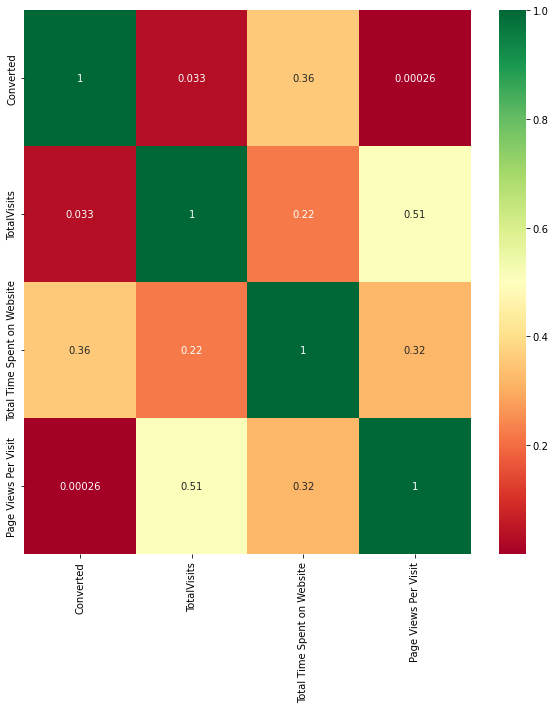

In [39]:
# checking the correlation plot to check for correlations among numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(lead3[num_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> from the above correlation plot, we can see that there is no strong correlation among any of the numerical variables </font> </div>

In [40]:
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

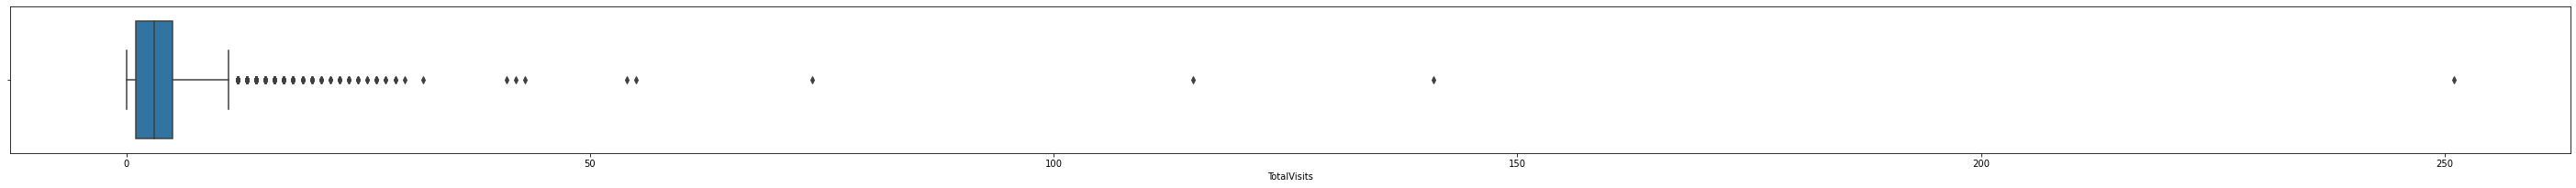

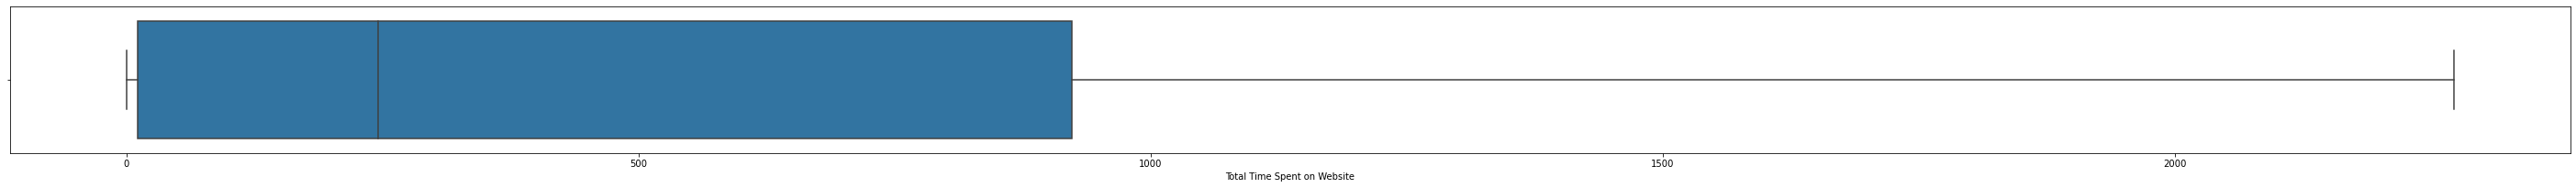

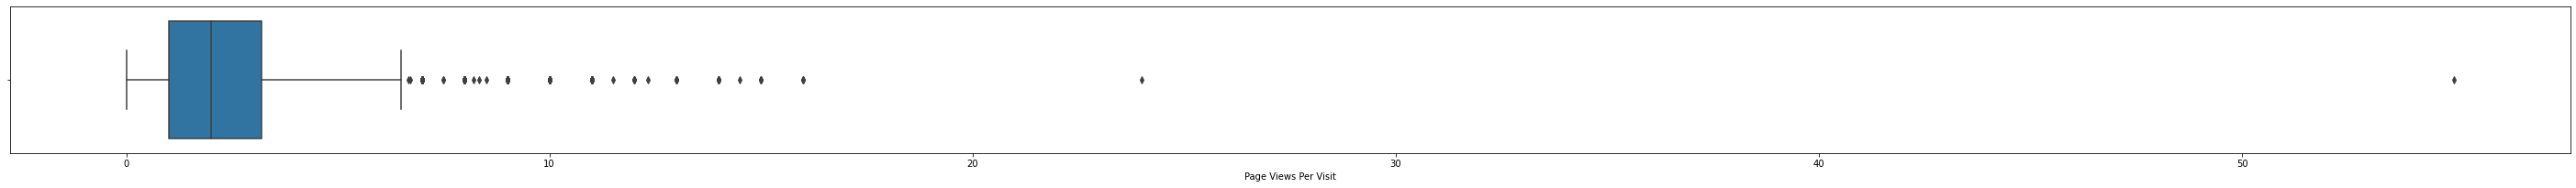

In [41]:
# now let's check the boxplots for numerical variables to see for any 
plt.figure(figsize=(50,10))
plt.subplot(3,1,1)
sns.boxplot(x='TotalVisits', data=lead3, )
plt.show()

plt.figure(figsize=(50,10))
plt.subplot(3,1,2)
sns.boxplot(x='Total Time Spent on Website', data=lead3, )
plt.show()

plt.figure(figsize=(50,10))
plt.subplot(3,1,3)
sns.boxplot(x='Page Views Per Visit', data=lead3, )
plt.show()

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> although there are some  outliers in the 'TotalVisits' and 'Page Views per visits' columns, these are important in model building and so we are not dropping these columns. Now moving ahead with creating dummy variables for categorical variables have more than 3 categories.</font> </div>

## Step-3: Creating Dummy Variables:

In [42]:
dummy1=pd.get_dummies(lead3[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first = 'True')
dummy1.head()

,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not selected,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not selected,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
lead4=pd.concat([lead3,dummy1],axis = 1)
lead4.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not selected,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not selected,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not selected,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,email opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct tr

In [44]:
lead4=lead4.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead4.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not selected,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not selected,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step-4: Splitting data into train and test data sets:

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = lead4.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not selected,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not selected,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
y = lead4['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'>now we need to scale the numerical columns using min-max scaler</font> </div>

In [49]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not selected,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not selected,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step-5: Model Building:

In [50]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
# Import RFE
from sklearn.feature_selection import RFE

In [52]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [53]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 42),
 ('Specialization_business administration', False, 48),
 ('Specialization_e-business', False, 57),
 ('Specialization_e-commerce', False, 60),
 ('Specialization_finance management', False, 50),
 ('Specialization_healthcare management', False, 56),
 ('Specialization_hospitality management', False, 6),
 ('Specialization_human resource management', False, 49),
 ('Specialization_international business', False, 36),
 ('Specialization_it projects management', False, 55),
 ('Specialization_marketing management', False, 64),
 ('Specialization_media and advertising', False, 29),
 ('Specialization_not selected', False, 2),
 ('Specialization_operations management', False, 54),
 ('Specialization_retail management', False, 17),
 ('Specialization_rural and agribusi

In [54]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'>all the columns selected by RFE are now stored in 'col' and will be used for building the model</font> </div>

In [55]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [56]:
# Importing statsmodels
import statsmodels.api as sm

In [57]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.4
Date:                Mon, 17 Apr 2023   Deviance:                       5254.8
Time:                        10:31:36   Pearson chi2:                 6.47e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3978
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0581      0.106    -19.428      0.000      -2.266      -1.850
TotalVisits                                              6.0485      1.492      4.055      0.000       3.125       8.972
Total Time Spent on Website                              4.6258      0.167     27.671      0.000       4.298       4.954
Lead Origin_landing page submission                     -0.3558      0.090     -3.968      0.000      -0.532      -0.180
Lead Origin_lead add form                                3.4941      0.233     14.964      0.000       3.036       3.952
Lead Source_olark chat                                   1.3633      0.125     10.867      0.000       1.117       1.609
Lead Source_welingak website                             2.5968      1.033      2.514      0.012       0.572       4.621
Do Not Email_yes                                        -1.4093      0.171     -8.220      0.000      -1.745      -1.073
Last Activity_had a phone conversation                   0.4998      0.849      0.589      0.556      -1.165       2.164
Last Activity_olark chat conversation                   -1.4409      0.168     -8.566      0.000      -1.771      -1.111
Last Activity_sms sent                                   1.2875      0.074     17.370      0.000       1.142       1.433
What is your current occupation_housewife               24.2817   3.05e+04      0.001      0.999   -5.97e+04    5.97e+04
What is your current occupation_not selected            -1.2097      0.086    -13.998      0.000      -1.379      -1.040
What is your current occupation_working professional     2.5373      0.194     13.107      0.000       2.158       2.917
Last Notable Activity_had a phone conversation          23.5521   2.14e+04      0.001      0.999   -4.19e+04    4.19e+04
Last Notable Activity_unreachable                        1.8019      0.602      2.992      0.003       0.621       2.982
========================================================================================================================
"""

In [58]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
#Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
7,Last Activity_had a phone conversation,1.89
13,Last Notable Activity_had a phone conversation,1.89
4,Lead Source_olark chat,1.55
9,Last Activity_sms sent,1.52
3,Lead Origin_lead add form,1.47
11,What is your current occupation_not selected,1.45
8,Last Activity_olark chat conversation,1.40


<font color='red'>**NOTE:**</font><div class="alert alert-info"><font color='Green'>The VIF values seem fine but the p-values aren't. we have two columns with high p-values "Last Notable Activity_had a phone conversation" & "What is your current occupation_housewife".Since we need to keep in mind the correlations these variables may have, we can drop only one column at a time. So removing 'Last Notable Activity had a phone conversation'</font></div>

In [60]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [61]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.1
Date:                Mon, 17 Apr 2023   Deviance:                       5262.2
Time:                        10:31:40   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0597      0.106    -19.441      0.000      -2.267      -1.852
TotalVisits                                              6.0994      1.492      4.087      0.000       3.174       9.025
Total Time Spent on Website                              4.6160      0.167     27.642      0.000       4.289       4.943
Lead Origin_landing page submission                     -0.3505      0.090     -3.910      0.000      -0.526      -0.175
Lead Origin_lead add form                                3.4921      0.234     14.952      0.000       3.034       3.950
Lead Source_olark chat                                   1.3657      0.125     10.885      0.000       1.120       1.612
Lead Source_welingak website                             2.6011      1.033      2.518      0.012       0.577       4.626
Do Not Email_yes                                        -1.4130      0.171     -8.248      0.000      -1.749      -1.077
Last Activity_had a phone conversation                   1.9215      0.685      2.807      0.005       0.580       3.263
Last Activity_olark chat conversation                   -1.4396      0.168     -8.560      0.000      -1.769      -1.110
Last Activity_sms sent                                   1.2872      0.074     17.373      0.000       1.142       1.432
What is your current occupation_housewife               23.2791   1.85e+04      0.001      0.999   -3.62e+04    3.63e+04
What is your current occupation_not selected            -1.2115      0.086    -14.018      0.000      -1.381      -1.042
What is your current occupation_working professional     2.5351      0.194     13.097      0.000       2.156       2.915
Last Notable Activity_unreachable                        1.8015      0.602      2.992      0.003       0.621       2.982
========================================================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
4,Lead Source_olark chat,1.55
9,Last Activity_sms sent,1.52
3,Lead Origin_lead add form,1.47
11,What is your current occupation_not selected,1.45
8,Last Activity_olark chat conversation,1.39
5,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.19


In [63]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.1
Date:                Mon, 17 Apr 2023   Deviance:                       5272.1
Time:                        10:31:42   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0521      0.106    -19.406      0.000      -2.259      -1.845
TotalVisits                                              6.0334      1.486      4.060      0.000       3.121       8.946
Total Time Spent on Website                              4.6120      0.167     27.644      0.000       4.285       4.939
Lead Origin_landing page submission                     -0.3468      0.090     -3.874      0.000      -0.522      -0.171
Lead Origin_lead add form                                3.4943      0.233     14.975      0.000       3.037       3.952
Lead Source_olark chat                                   1.3617      0.125     10.863      0.000       1.116       1.607
Lead Source_welingak website                             2.5941      1.033      2.511      0.012       0.570       4.619
Do Not Email_yes                                        -1.4161      0.171     -8.270      0.000      -1.752      -1.080
Last Activity_had a phone conversation                   1.9152      0.684      2.799      0.005       0.574       3.257
Last Activity_olark chat conversation                   -1.4424      0.168     -8.578      0.000      -1.772      -1.113
Last Activity_sms sent                                   1.2816      0.074     17.311      0.000       1.137       1.427
What is your current occupation_not selected            -1.2146      0.086    -14.062      0.000      -1.384      -1.045
What is your current occupation_working professional     2.5297      0.194     13.073      0.000       2.150       2.909
Last Notable Activity_unreachable                        1.7964      0.602      2.984      0.003       0.616       2.976
========================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
4,Lead Source_olark chat,1.55
9,Last Activity_sms sent,1.52
3,Lead Origin_lead add form,1.47
10,What is your current occupation_not selected,1.45
8,Last Activity_olark chat conversation,1.39
5,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.19


<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'>in the 3rd model, all VIF values are acceptable and p-values are also within the range. so we can fix this model</font> </div>

## Step-6: Predicting using the model:

In [66]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.625335
3604    0.129536
5584    0.213186
7679    0.129536
7563    0.476038
7978    0.822380
7780    0.158674
7863    0.982644
838     0.815283
708     0.183713
dtype: float64

In [67]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.62533529, 0.1295355 , 0.2131863 , 0.1295355 , 0.47603756,
       0.82238047, 0.15867431, 0.98264372, 0.81528267, 0.18371277])

In [68]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.625335
1,0,0.129536
2,0,0.213186
3,0,0.129536
4,0,0.476038


In [69]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.625335,1
1,0,0.129536,0
2,0,0.213186,0
3,0,0.129536,0
4,0,0.476038,0


## Step-7: Model Evaluation: 

In [70]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [71]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 737, 1719]])

In [72]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8119981105337742

In [73]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [74]:
# Calculating the sensitivity
TP/(TP+FN)

0.6999185667752443

In [75]:
# Calculating the specificity
TN/(TN+FP)

0.8826700898587934

<font color='red'>**NOTE:**</font><div class="alert alert-info"><font color='Green'>for the current model, the accuracy is 81.19%, sensitivity is 69.99% and specificity is 88.26%. bu we need to check the ROC curve to check for the actual cutoff</font></div>

In [76]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

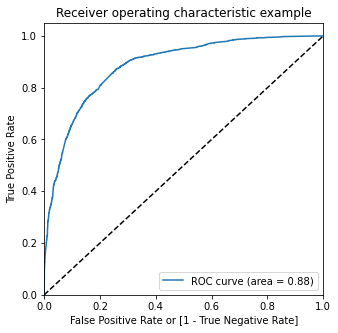

In [78]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color='red'>**NOTE:**</font><div class="alert alert-info"><font color='Green'>The area under ROC curve is 0.87 which is a very good value. and the curve is not close to 45 degree line. hence here TPR is high and FPR is low which suggests it is a good model.</font></div>

In [79]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.625335,1,1,1,1,1,1,1,1,0,0,0
1,0,0.129536,0,1,1,0,0,0,0,0,0,0,0
2,0,0.213186,0,1,1,1,0,0,0,0,0,0,0
3,0,0.129536,0,1,1,0,0,0,0,0,0,0,0
4,0,0.476038,0,1,1,1,1,1,0,0,0,0,0


In [80]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.582900,0.982899,0.330680
0.2,0.2,0.760983,0.916531,0.662901
0.3,0.3,0.790899,0.874186,0.738383
0.4,0.4,0.811841,0.768730,0.839024
0.5,0.5,0.811998,0.699919,0.882670
0.6,0.6,0.802236,0.628664,0.911682
0.7,0.7,0.774839,0.506107,0.944288
0.8,0.8,0.753267,0.414495,0.966881
0.9,0.9,0.707605,0.263436,0.987677


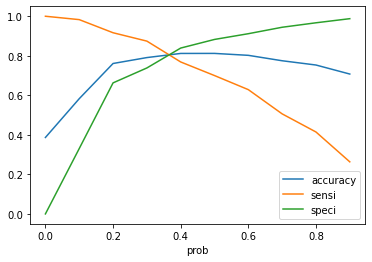

In [81]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color='red'>**NOTE:**</font><div class="alert alert-info"><font color='Green'>From the graph it is visible that the optimal cut off is approximately at 0.35. So we'll use 0.35 as sutoff for further analysing the performance of the model.</font></div>

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.625335,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.213186,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.476038,0,1,1,1,1,1,0,0,0,0,0,1


In [83]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8017635018107385

In [84]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3142,  753],
       [ 506, 1950]])

In [85]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [86]:
# Calculating the sensitivity
TP/(TP+FN)

0.7939739413680782

In [87]:
# Calculating the specificity
TN/(TN+FP)

0.8066752246469833

<font color='red'>**NOTE:**</font><div class="alert alert-info"><font color='Green'>With the current cut off as 0.35 we have accuracy of 80.17%, sensitivity of 79.39% and specificity of 80.66%</font></div>

## Step-8: Prediction on the test set:

In [88]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [89]:
# Substituting all the columns in the final train model
col = X_train.columns

In [90]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_not selected,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,1,0,0,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,1,0,0,0,0,0,0,1,0,1,0
2085,1.0,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0
4048,1.0,0.028369,0.617077,1,0,0,0,0,0,0,1,0,0,0
4790,1.0,0.028369,0.005282,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,1,0,0,0,1,0,0,0,0
8179,1.0,0.170213,0.148768,1,0,0,0,0,0,0,1,1,0,0
6236,1.0,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0,0
5240,1.0,0.078014,0.458627,1,0,0,0,0,0,0,1,0,0,0


In [91]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.434703
1,1,0.830560
2,1,0.982644
3,1,0.869866
4,0,0.099441


In [92]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.434703,1
1,1,0.830560,1
2,1,0.982644,1
3,1,0.869866,1
4,0,0.099441,0
...,...,...,...
2718,1,0.105946,0
2719,0,0.350039,1
2720,0,0.129536,0
2721,1,0.812834,1


In [93]:
# Check the overall accuracy
print("Accuracy of model when cutoff is 0.35 is:")
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

Accuracy of model when cutoff is 0.35 is:


0.8090341535071612

In [94]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1408,  336],
       [ 184,  795]])

In [95]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [96]:
# Calculating the sensitivity
print("Sensitivity of the model at cutoff =0.35 is:")
TP/(TP+FN)

Sensitivity of the model at cutoff =0.35 is:


0.8120531154239019

In [97]:
# Calculating the specificity
print("specificity of the model at cutoff=0.35 is:")
TN/(TN+FP)

specificity of the model at cutoff=0.35 is:


0.8073394495412844

## Step-9: Precision-Recall tradeoff:

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 737, 1719]])

In [99]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7899816176470589

In [100]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6999185667752443

### 9.1. Precision and recall tradeoff

In [101]:
from sklearn.metrics import precision_recall_curve

In [102]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [103]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

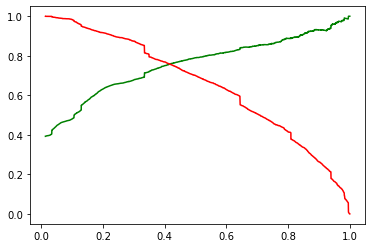

In [104]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<font color='red'>**NOTE:**</font><div class="alert alert-info"><font color='Green'>from the above precision-recall curve the cutoff is 0.41. so we'll check the performance of the model at this new cutoff</font></div>

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.625335,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.213186,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.476038,0,1,1,1,1,1,0,0,0,0,0,1


In [106]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8118406550149583

In [107]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3285,  610],
       [ 585, 1871]])

In [108]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [109]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7541313986295849

In [110]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7618078175895765

In [111]:
# Calculating the sensitivity
print("Sensitivity of the model at cutoff = 0.41 is:")
TP/(TP+FN)

Sensitivity of the model at cutoff = 0.41 is:


0.7618078175895765

In [112]:
# Calculating the specificity
print("specificity of the model at cutoff = 0.41 is:")
TN/(TN+FP)

specificity of the model at cutoff = 0.41 is:


0.8433889602053916

10. Prediction on Test set

In [113]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.434703
1,1,0.830560
2,1,0.982644
3,1,0.869866
4,0,0.099441


In [114]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.434703,1
1,1,0.830560,1
2,1,0.982644,1
3,1,0.869866,1
4,0,0.099441,0
...,...,...,...
2718,1,0.105946,0
2719,0,0.350039,0
2720,0,0.129536,0
2721,1,0.812834,1


In [115]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8163789937568858

In [116]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1473,  271],
       [ 229,  750]])

In [117]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [118]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7345739471106758

In [119]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7660878447395302

# <font color='red'>Conclusion:</font>

It was found that the following parameters are effecting the conversion rate of potential hot leads:

* The total time spend on the Website.
* Total number of visits.
* When the lead source was:Google, Direct traffic, Organic search
* When the last activity was: SMS, Olark chat conversation
* When the lead origin is Lead add format.
* When their current occupation is as a working professional.

by focussing on these potential parameters, X Education can focus on these variables to achieve the best conversion rate

# ----------------------------------The End----------------------------------------